# Projeto Machine Learning

Glossário do conjunto de dados (em colunas)

- ID: identificador exclusivo do cliente
- Year_Birth: Ano de nascimento do cliente
- Education: nível de escolaridade do cliente
- Marital_Status: estado civil do cliente
- Income: renda familiar anual do cliente
- Kidhome: Número de crianças na residência do cliente
- Teenhome: Número de adolescentes na residência do cliente
- Dt_Customer: Data de cadastro do cliente na empresa
- Recency: número de dias desde a última compra do cliente
- Recover: 1 se o cliente reclamou nos últimos 2 anos, 0 caso contrário
Produtos

- MntWines: Valor gasto em vinho nos últimos 2 anos
- MntFruits: Valor gasto com frutas nos últimos 2 anos
- MntMeatProducts: Valor gasto com carne nos últimos 2 anos
- MntFishProducts: Valor gasto com pescado nos últimos 2 anos
- MntSweetProducts: Valor gasto em doces nos últimos 2 anos
- MntGoldProds: Valor gasto em ouro nos últimos 2 anos

- NumDealsPurchases: Número de compras realizadas com desconto
- AcceptedCmp1: 1 se o cliente aceitou a oferta na 1ª campanha, 0 caso contrário
- AcceptedCmp2: 1 se o cliente aceitou a oferta na 2ª campanha, 0 caso contrário
- AcceptedCmp3: 1 se o cliente aceitou a oferta na 3ª campanha, 0 caso contrário
- AcceptedCmp4: 1 se o cliente aceitou a oferta na 4ª campanha, 0 caso contrário
- AcceptedCmp5: 1 se o cliente aceitou a oferta na 5ª campanha, 0 caso contrário
- Response: 1 se o cliente aceitou a oferta na última campanha, 0 caso contrário

- NumWebPurchases: Quantidade de compras realizadas pelo site da empresa
- NumCatalogPurchases: Número de compras feitas usando um catálogo
- NumStorePurchases: Número de compras feitas diretamente nas lojas
- NumWebVisitsMonth: Número de visitas ao site da empresa no último mês

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact
import seaborn as sns
import warnings
from datetime import datetime
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.impute import KNNImputer
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Projeto - Machine Learning II/marketing_campaign.csv', sep="\t")

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## Conhecendo os Dados

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
# Percorrer colunas categóricas para a contagem de valores exclusivos

unique_value_counts = {}

for column in df.select_dtypes(include=['object']):
    unique_values = df[column].nunique()
    unique_value_counts[column] = unique_values

print(unique_value_counts)

{'Education': 5, 'Marital_Status': 8, 'Dt_Customer': 663}


In [ ]:
# Percorrer colunas numéricas para a contagem de valores exclusivos
unique_value_counts = {}

for column in df.select_dtypes(include=['int64', 'float']):
    unique_values = df[column].nunique()
    unique_value_counts[column] = unique_values

print(unique_value_counts)

{'ID': 2240, 'Year_Birth': 59, 'Income': 1974, 'Kidhome': 3, 'Teenhome': 3, 'Recency': 100, 'MntWines': 776, 'MntFruits': 158, 'MntMeatProducts': 558, 'MntFishProducts': 182, 'MntSweetProducts': 177, 'MntGoldProds': 213, 'NumDealsPurchases': 15, 'NumWebPurchases': 15, 'NumCatalogPurchases': 14, 'NumStorePurchases': 14, 'NumWebVisitsMonth': 16, 'AcceptedCmp3': 2, 'AcceptedCmp4': 2, 'AcceptedCmp5': 2, 'AcceptedCmp1': 2, 'AcceptedCmp2': 2, 'Complain': 2, 'Z_CostContact': 1, 'Z_Revenue': 1, 'Response': 2}


In [ ]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
df[df.duplicated()].sum()

ID                     0.0
Year_Birth             0.0
Education              0.0
Marital_Status         0.0
Income                 0.0
Kidhome                0.0
Teenhome               0.0
Dt_Customer            0.0
Recency                0.0
MntWines               0.0
MntFruits              0.0
MntMeatProducts        0.0
MntFishProducts        0.0
MntSweetProducts       0.0
MntGoldProds           0.0
NumDealsPurchases      0.0
NumWebPurchases        0.0
NumCatalogPurchases    0.0
NumStorePurchases      0.0
NumWebVisitsMonth      0.0
AcceptedCmp3           0.0
AcceptedCmp4           0.0
AcceptedCmp5           0.0
AcceptedCmp1           0.0
AcceptedCmp2           0.0
Complain               0.0
Z_CostContact          0.0
Z_Revenue              0.0
Response               0.0
dtype: float64

In [ ]:
df.describe(percentiles=[.05,.5,.25,.75,.95,.99])

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
5%,576.850000,1950.000000,18985.500000,0.000000,0.000000,4.000000,3.000000,0.000000,4.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
95%,10675.050000,1988.000000,84130.000000,1.000000,1.000000,94.000000,1000.000000,123.000000,687.100000,168.050000,...,8.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.0,11.0,1.000000
99%,11074.610000,1992.000000,94458.800000,2.000000,2.000000,98.000000,1285.000000,172.000000,915.000000,226.220000,...,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.0,11.0,1.000000


- "Z_CostContact" e "Z_Revenue" não contribuem com insights significativos; portanto, removeremos essas colunas.
- Aproximadamente 95% dos clientes têm 1 ou 0 adolescentes ou crianças em suas residências.
- Podemos criar uma nova coluna chamada “children” agregando estas duas variáveis, e ver se obtemos informações mais interessantes.
- Não há clientes cadastrados na base de dados com ausência de compras com duração superior a 100 dias.
- A campanha mais recente (Response Column) obteve a maior taxa de aceitação.
- A carne e o vinho destacam-se como os produtos mais lucrativos (com grande diferença em relação aos restantes).

In [ ]:
df.Education.value_counts(dropna=False, normalize=True)

Graduation    0.503125
PhD           0.216964
Master        0.165179
2n Cycle      0.090625
Basic         0.024107
Name: Education, dtype: float64

In [ ]:
df.Marital_Status.value_counts(dropna=False, normalize=True)

Married     0.385714
Together    0.258929
Single      0.214286
Divorced    0.103571
Widow       0.034375
Alone       0.001339
Absurd      0.000893
YOLO        0.000893
Name: Marital_Status, dtype: float64

## Análise Exploratória

Cerca de 88% de nossos clientes se formaram ou mais, o que nos dá uma boa dica sobre as faixas etárias que podemos observar.
- Extrair a “Idade” de um cliente pelo “Year_Birth” indicando o ano de nascimento da respectiva pessoa
- Substituir  "Alone" por "Single".

Parece que certos indivíduos não responderam positivamente às perguntas sobre este assunto.

Se verificarmos que esta coluna em particular carece de um valor informativo substancial, pode ser prudente contemplar a sua omissão.

Engenharia de recursos:
Uma abordagem poderia envolver a categorização de instâncias rotuladas como

- "YOLO" e "Absurdo" como "Single".
- Simplificar a coluna `Marital Status`, categorizando como "Partner" ou "Not Partner"

- Mesma abordagem para a coluna `Graduated`, categorizando-a em "Post Graduated" "Graduated" ou "Not Graduated".

In [ ]:
df_copy = df.copy()

In [ ]:
def initial_cleaning(df):
    """Do the initial changes describe it above"""
    df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'],format="%d-%m-%Y")
    df['Marital_Status'] = df.loc[:,'Marital_Status'].str.replace('Alone','Single')
    df['Marital_Status'] = df.loc[:,'Marital_Status'].apply(lambda x: "Single" if x == 'YOLO' or x == 'Absurd' else x)
    df["Children"]=df["Kidhome"]+df["Teenhome"]
    return df

df_copy = initial_cleaning(df_copy)

In [ ]:
from datetime import datetime

# Obtém o ano atual
ano_atual = datetime.now().year

def feat_engineering(df):
    not_graduated = ['Basic','2n cycle']
    post_graduated = ['Master','PhD']
    couple = ['Married','Together']
    df['Age'] = ano_atual - df['Year_Birth']
    df['Education'] = df['Education'].apply(lambda x: 'Not Graduated' if x in not_graduated else ('Post Graduated' if x in post_graduated else 'Graduated'))
    df['Partner'] = df['Marital_Status'].apply(lambda x: 'Partner' if x in couple else 'Not Partner')
    df["Family_Size"] = df["Partner"].replace({"Not Partner": 1, "Partner":2})+ df["Children"]

    df.drop(['Marital_Status','Year_Birth','ID','Z_CostContact','Z_Revenue', 'Dt_Customer'], axis=1, inplace=True)

    return df

df_copy = feat_engineering(df_copy);

In [ ]:
df_copy.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Children,Age,Partner,Family_Size
0,Graduated,58138.0,0,0,58,635,88,546,172,88,...,0,0,0,0,0,1,0,66,Not Partner,1
1,Graduated,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,0,0,0,2,69,Not Partner,3
2,Graduated,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,0,0,0,0,58,Partner,2
3,Graduated,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,0,0,0,1,39,Partner,3
4,Post Graduated,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,0,0,0,1,42,Partner,3


In [ ]:
sns.set_theme(context= 'notebook')
sns.set_style('dark')
sns.set(rc={'axes.grid':False})
sns.set_palette('mako')

In [ ]:
def num_plot(df, col):
  """Graph an histogram with a boxplot above
	for one numerical column"""
  fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,4),gridspec_kw={"height_ratios": (.2, .8)})
  sns.boxplot(x=col, data=df, ax=ax[0], color='#7171cf', linewidth=1.5)
  ax[0].set_xlabel(None)
  ax[0].set(yticks=[])
  sns.histplot(x=col, data=df, ax=ax[1], alpha=.6, color='#7171cf')
  ax[1].set_xlabel(col.replace('_',' ').title(), fontsize=22, loc= 'left')
  plt.axvline(df[col].mean(), color='#39568CFF', linewidth=2.2, label='mean=' + str(np.round(df[col].mean(),1)))
  plt.axvline(df[col].median(), color='#1F968BFF', linewidth=2.2, label='median='+ str(np.round(df[col].median(),1)))
  plt.axvline(df[col].mode()[0], color='#440154FF', linewidth=2.2, label='mode='+ str(df[col].mode()[0]))
  plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=10, fancybox=True, shadow=True, frameon=True)
  plt.tight_layout()
  return ax

def countplot_catcols(df,column,width,height):
	"""Count frequency for each group"""
	fig, ax  = plt.subplots(figsize=(width,height))
	ax=sns.countplot(y=column, data=df,
                  palette='viridis',
                  orient='h',
				  order = df[column].value_counts().index)
	ax.set_xticklabels(ax.get_xticklabels())
	ax.bar_label(ax.containers[0])
	ax.set_title(f'Frequency of {column} categories', loc='left', size=18)
	plt.tight_layout()
	return ax

def barplot_category(df,x,y,title):
  """Plot a barplot"""
  fig, ax  = plt.subplots(figsize=(8,2))
  ax  = sns.barplot(data=df, x=x, y=y,
              orient='h', palette='mako',
              seed=2)
  plt.title(title, loc='left', size=16)
  return ax

### Perfil dos clientes

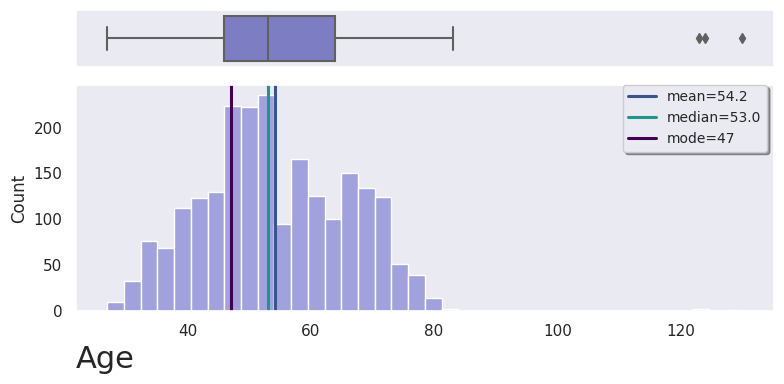

In [ ]:
num_plot(df_copy, 'Age')
plt.show()

In [ ]:
age_clusters = pd.cut(df_copy.Age, [-np.inf,30,60,np.inf],
                      labels=['Young','Adult','Elderly'])
age_clusters.value_counts(normalize=True).sort_index()

Young      0.006696
Adult      0.681250
Elderly    0.312054
Name: Age, dtype: float64

In [ ]:
df_copy['Age_Category'] = age_clusters

Aproximadamente 76% da nossa base de clientes tem entre 30 e 60 anos. Isso indica que a faixa etária predominante entre nossos clientes se enquadra na categoria adulta.

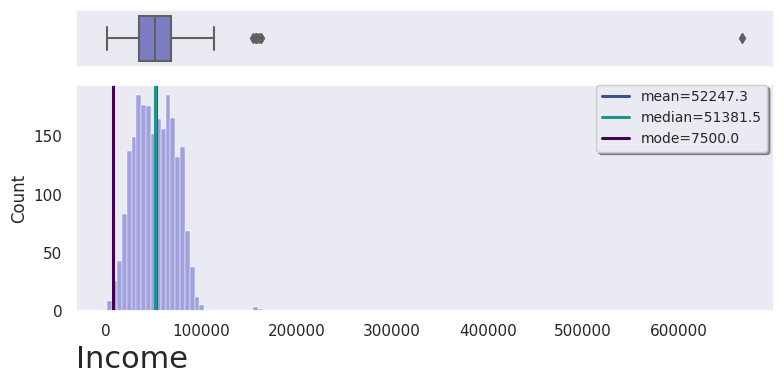

In [ ]:
num_plot(df_copy, 'Income')
plt.show()

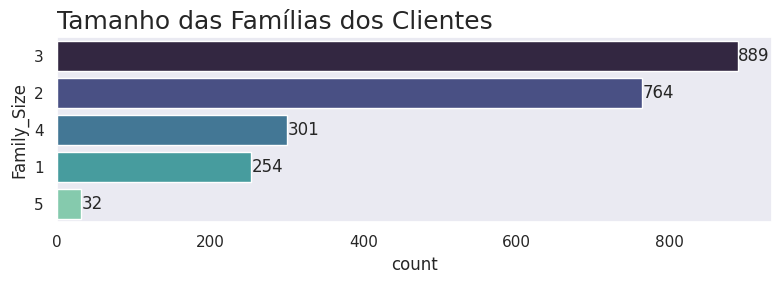

In [ ]:
fig, ax  = plt.subplots(figsize=(8,3))
ax=sns.countplot(y='Family_Size', data=df_copy,
                  palette='mako',
                  orient='h',
				  order = df_copy['Family_Size'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels())
ax.bar_label(ax.containers[0])
ax.set_title('Tamanho das Famílias dos Clientes', loc='left', size=18)
plt.tight_layout()
plt.show()

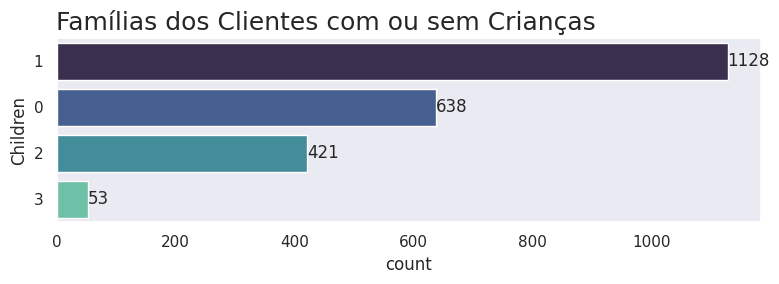

In [ ]:
fig, ax  = plt.subplots(figsize=(8,3))
ax=sns.countplot(y='Children', data=df_copy,
                  palette='mako',
                  orient='h',
				  order = df_copy['Children'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels())
ax.bar_label(ax.containers[0])
ax.set_title('Famílias dos Clientes com ou sem Crianças', loc='left', size=18)
plt.tight_layout()
plt.show()

Maioria dos clientes no conjunto de dados tem apenas um ou menos jovens (adolescentes ou crianças) em casa.

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 640x480 with 0 Axes>

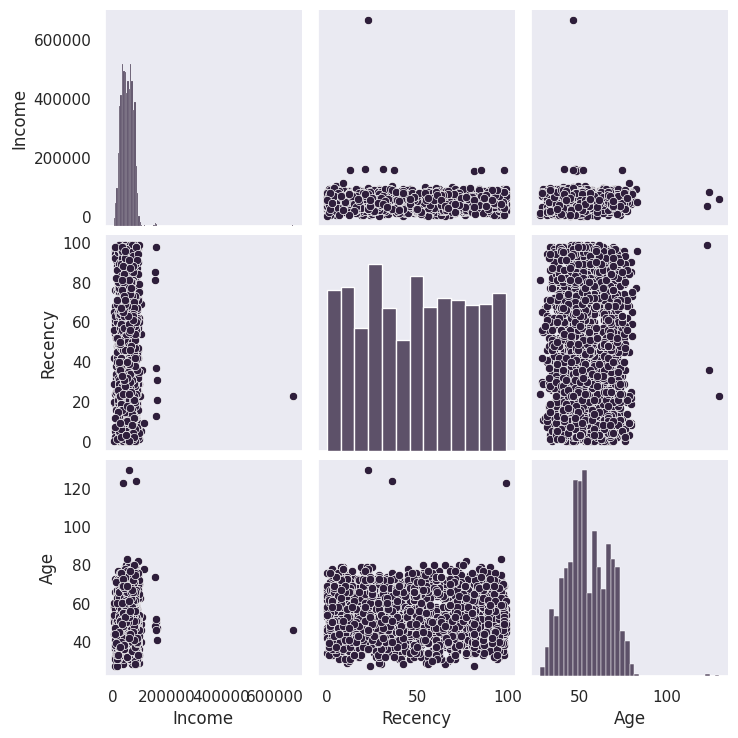

In [ ]:
To_Plot = [ "Income", "Recency", "Age"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(df_copy[To_Plot],palette= (["#682F2F","#F3AB60"]))

plt.show()

É possível perceber alguns outliers nas colunas de Idade ('Age') e Renda ('Income'). Logo farei a exclusão.

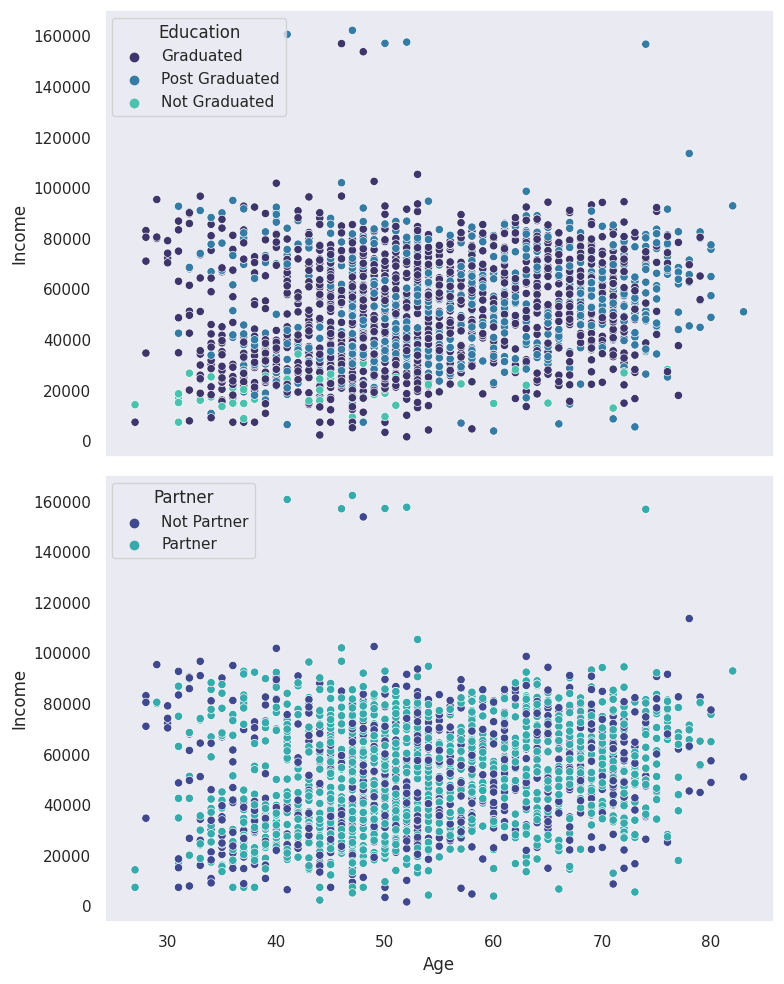

In [ ]:
df_without_outliers = df_copy.loc[(df_copy.Age < 100) & (df_copy.Income < 600_000)]

fig, ax = plt.subplots(2,1, figsize=(8,10), sharex=True)
sns.scatterplot(data=df_without_outliers,
                x='Age',
                y='Income',
                hue='Education',
                palette='mako',
               ax=ax[0])

sns.scatterplot(data=df_without_outliers,
                x='Age',
                y='Income',
                hue='Partner',
                palette='mako',
               ax=ax[1])
plt.tight_layout()
plt.show()


### Que padrões podemos encontrar no seu comportamento de consumo?

In [ ]:
products_subset = df_copy.loc[:, :'MntGoldProds'].drop(['Kidhome','Teenhome'], axis=1)
demographic_subset = df_copy[['Age','Age_Category','Partner']]

purchase = pd.concat([products_subset, demographic_subset], axis=1)

purchase['MntTotal'] = purchase.loc[:,'MntWines':'MntGoldProds'].sum(1)

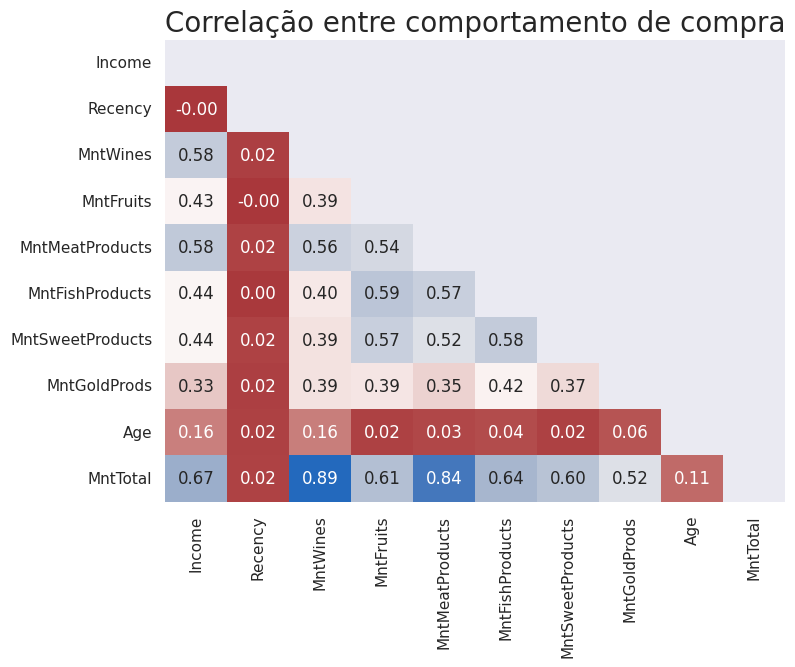

In [ ]:
purchase_numbers = purchase.select_dtypes('number')
plt.figure(figsize=(8,6))
mask = np.triu(np.ones_like(purchase_numbers.corr(), dtype=bool))
sns.heatmap(purchase_numbers.corr(), annot=True, cmap='vlag_r', fmt='.2f', cbar=False, mask=mask)
plt.title('Correlação entre comportamento de compra', size=20, loc='left')
plt.show()

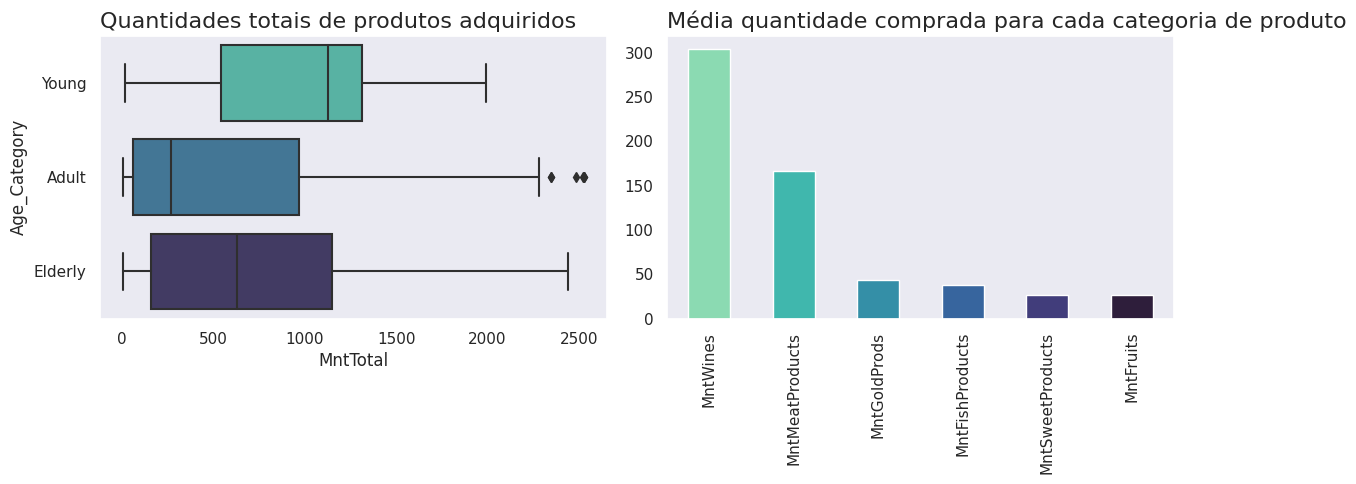

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

sns.boxplot(x='MntTotal',
            y='Age_Category',
            data=purchase,
            palette='mako_r',
            linewidth=1.5,
           ax=ax[0])
ax[0].set_title('Quantidades totais de produtos adquiridos', loc='left', size=16)

df_copy.loc[:,'MntWines':'MntGoldProds'].mean().sort_values(ascending=False)\
    .plot(kind='bar',
          color=sns.color_palette('mako_r'),
         ax=ax[1])
ax[1].set_title('Média quantidade comprada para cada categoria de produto', size=16, loc='left')

plt.tight_layout()
plt.show()

É evidente que existe uma correlação entre a quantidade de produtos adquiridos e a idade do cliente, que por sua vez está ligada à sua renda. Geralmente, uma idade mais elevada corresponde a rendimentos mais elevados e a maiores compras de produtos.

Como observamos antes, há definitivamente um vencedor claro quando se trata de vendas. No entanto, embora a quantidade de produtos relacionados à carne seja quase metade, eles ainda apresentam números impressionantes.

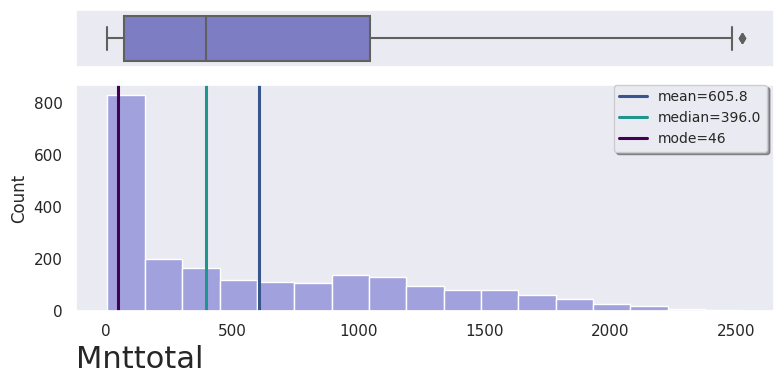

In [ ]:
df_copy['MntTotal'] = df_copy.loc[:,'MntWines':'MntGoldProds'].sum(1)

num_plot(purchase,'MntTotal')
plt.show()

In [ ]:
products = ['MntWines','MntFruits','MntMeatProducts',
            'MntFishProducts','MntSweetProducts','MntGoldProds','MntTotal']

purchase.groupby('Partner')[products].mean().astype(int).style.background_gradient(cmap='vlag_r')

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,MntTotal
Partner,,,,,,,
Not Partner,306,27,172,38,28,46,620
Partner,302,25,163,36,26,42,597


In [ ]:
temp_df = pd.pivot_table(purchase, index='Partner', columns='Age_Category', values='MntTotal', aggfunc='mean')
print('Avg. Total amount purchased:')
temp_df.fillna(0).astype(int).style.background_gradient(cmap='vlag_r')

Avg. Total amount purchased:


Age_Category,Young,Adult,Elderly
Partner,,,
Not Partner,1068,557,732
Partner,630,545,712


Clientes sem parceiro tendem a gastar mais na maioria das categorias, exceto em vinhos, onde a diferença é pequena. Isto provavelmente se deve à inclusão de clientes viúvos neste grupo, que normalmente têm mais de 60 anos e fazem parte do grupo demográfico com maiores gastos.

#### E a relação dos clientes com os estabelecimentos? Como participação em campanhas ou reclamações e feedbacks

In [ ]:
!pip install squarify

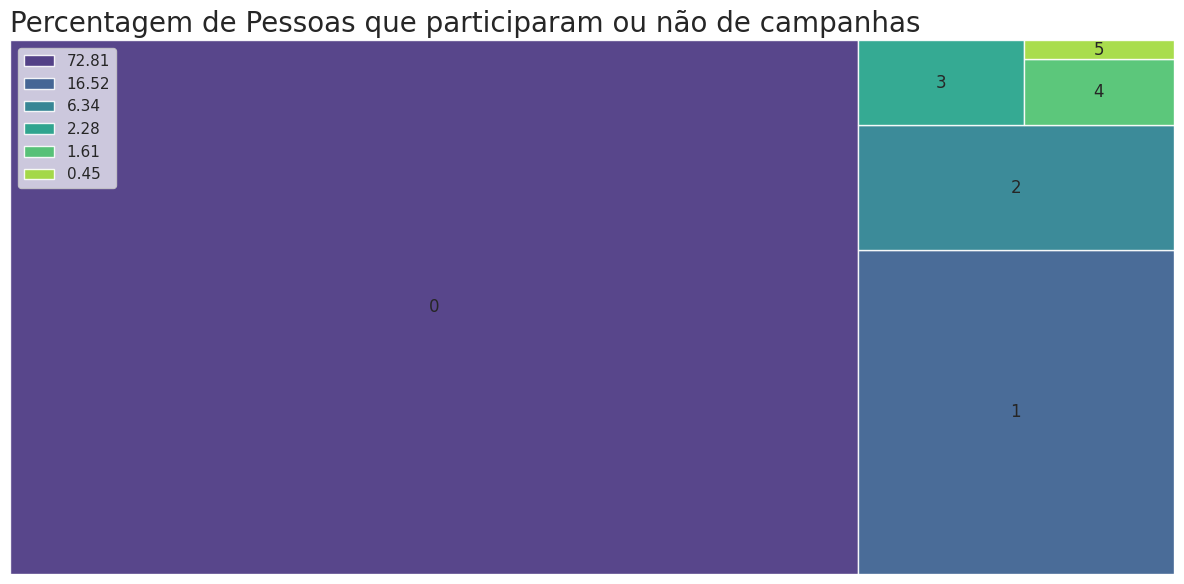

In [ ]:
import squarify
campaigns = df_copy.loc[:,'AcceptedCmp3':'Response'].drop('Complain', axis=1)

people_acceptance = campaigns.sum(1).value_counts(normalize=True).sort_values(ascending=False)

plt.figure(figsize=(12,6))
squarify.plot(sizes=people_acceptance, label=people_acceptance.index,
              color=sns.color_palette('viridis',len(people_acceptance)),
              alpha=.9)
plt.legend(np.round(people_acceptance*100,2))
plt.axis('off')
plt.title('Percentagem de Pessoas que participaram ou não de campanhas', loc='left', size=20)
plt.tight_layout()
plt.show()

Aproximadamente 73% dos clientes nunca aceitaram nem mesmo uma única campanha de marketing.

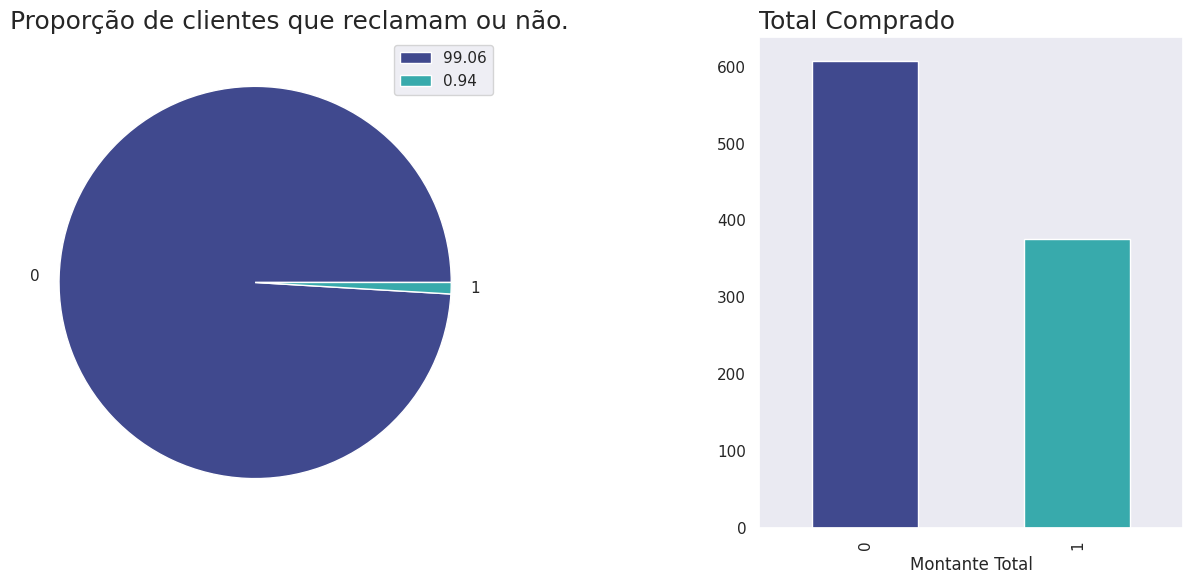

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), gridspec_kw={'width_ratios': [3, 1]})

df_copy.loc[:, 'Complain'].value_counts().plot(kind='pie', ax=axes[0], colors=sns.color_palette('mako', 2))
axes[0].set_title('Proporção de clientes que reclamam ou não.', size=18, loc='left')
axes[0].legend(np.round(df_copy.loc[:, 'Complain'].value_counts(normalize=True) * 100, 2))
axes[0].axis('off')

df_copy.groupby('Complain')['MntTotal'].mean().plot(kind='bar', color=sns.color_palette('mako', 2), ax=axes[1])
axes[1].set_title('Total Comprado', size=18, loc='left')
axes[1].set_xlabel('Montante Total')

plt.tight_layout()
plt.show()

- 0 não reclama
- 1 reclama
- Menos de 1% dos clientes reclamaram.
- Como esperado, os clientes que reclamaram gastaram menos.

## Pré-Processamento

In [ ]:
df_copy.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Children,Age,Partner,Family_Size,Age_Category,MntTotal
0,Graduated,58138.0,0,0,58,635,88,546,172,88,...,0,0,0,1,0,66,Not Partner,1,Elderly,1617
1,Graduated,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,0,2,69,Not Partner,3,Elderly,27
2,Graduated,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,0,0,58,Partner,2,Adult,776
3,Graduated,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,0,1,39,Partner,3,Adult,53
4,Post Graduated,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,0,1,42,Partner,3,Adult,422


In [ ]:
#Get list of categorical variables
s = (df_copy.dtypes == 'object')
object_cols = list(s[s].index)

print("Variáveis Categóricas:", object_cols)

Variáveis Categóricas: ['Education', 'Partner']


In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Education            2240 non-null   object  
 1   Income               2216 non-null   float64 
 2   Kidhome              2240 non-null   int64   
 3   Teenhome             2240 non-null   int64   
 4   Recency              2240 non-null   int64   
 5   MntWines             2240 non-null   int64   
 6   MntFruits            2240 non-null   int64   
 7   MntMeatProducts      2240 non-null   int64   
 8   MntFishProducts      2240 non-null   int64   
 9   MntSweetProducts     2240 non-null   int64   
 10  MntGoldProds         2240 non-null   int64   
 11  NumDealsPurchases    2240 non-null   int64   
 12  NumWebPurchases      2240 non-null   int64   
 13  NumCatalogPurchases  2240 non-null   int64   
 14  NumStorePurchases    2240 non-null   int64   
 15  NumWebVisitsMonth    

In [ ]:
df_numerical = pd.get_dummies(df_copy,columns=['Education', 'Partner', 'Age_Category'])
#df_numerical.drop(['Year_Birth', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)
df_numerical = df_numerical.dropna()

In [ ]:
df_numerical.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Family_Size,MntTotal,Education_Graduated,Education_Not Graduated,Education_Post Graduated,Partner_Not Partner,Partner_Partner,Age_Category_Young,Age_Category_Adult,Age_Category_Elderly
0,58138.0,0,0,58,635,88,546,172,88,88,...,1,1617,1,0,0,1,0,0,0,1
1,46344.0,1,1,38,11,1,6,2,1,6,...,3,27,1,0,0,1,0,0,0,1
2,71613.0,0,0,26,426,49,127,111,21,42,...,2,776,1,0,0,0,1,0,1,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,3,53,1,0,0,0,1,0,1,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,3,422,0,0,1,0,1,0,1,0


In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerical)

# Aplique o PCA
pca = PCA(n_components = 2)
principal_components = pca.fit_transform(df_scaled)

In [ ]:
principal_components

array([[ 4.87557274, -0.12018115],
       [-2.54405471,  1.38644275],
       [ 1.8520664 , -0.91736809],
       ...,
       [ 2.33645319, -2.07371534],
       [ 1.69215068,  3.09196838],
       [-2.2499071 ,  3.14647978]])

## Clusterização
* PCA
* Kmeans

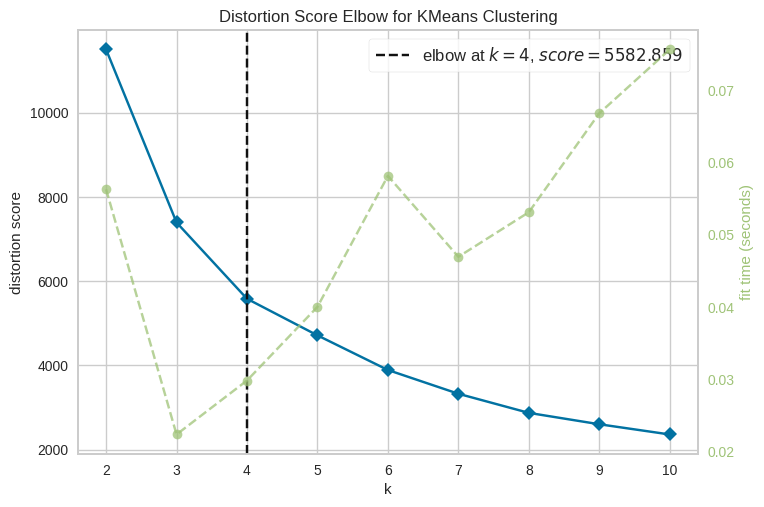

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(principal_components)
Elbow_M.show()

In [ ]:
from sklearn.cluster import KMeans
import plotly.express as px
df_pca = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, 3)])
# Aplique o K-Means aos dados do PCA
kmeans = KMeans(n_clusters=4, random_state=42)  # Defina o número de clusters desejado
clusters = kmeans.fit_predict(principal_components)

# Adicione as informações de cluster ao DataFrame PCA
df_pca['Cluster'] = clusters

# Visualize os clusters no scatter plot das duas primeiras componentes principais
#fig = px.scatter(df_pca, x='PC1', y='PC2', color='Cluster', hover_data=df_numerical.columns, title='K-Means Clustering após PCA')
fig = px.scatter(df_pca, x='PC1', y='PC2', color='Cluster', title='K-Means Clustering após PCA')

fig.show()

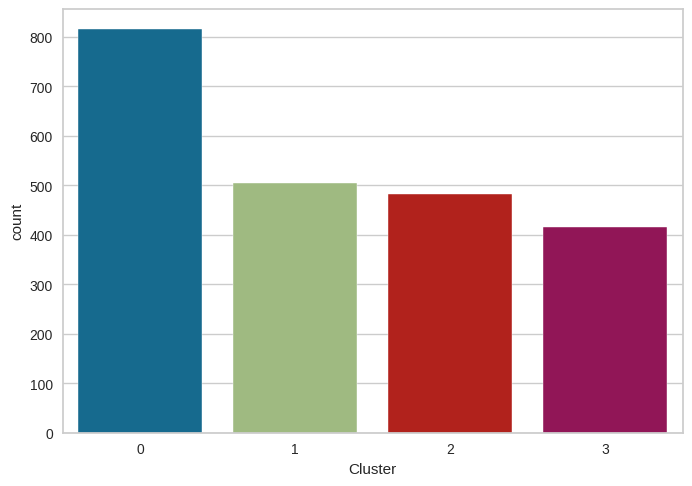

In [ ]:
plot = sns.countplot(x=df_pca['Cluster'])
plt.show()

In [ ]:
'''df_cluster = pd.merge(df_numerical, df_pca, left_index=True, right_index=True)
df_cluster.drop(['PC1','PC2'], axis=1, inplace=True)
df_cluster'''

"df_cluster = pd.merge(df_numerical, df_pca, left_index=True, right_index=True)\ndf_cluster.drop(['PC1','PC2'], axis=1, inplace=True)\ndf_cluster"

In [ ]:
# df_cluster.to_csv('/content/drive/MyDrive/Projeto - Machine Learning II/dataset_cluster.csv', index=False)

## Perfil dos Clusters
O que vamos levar em consideração:

- Familia
- Tipos de Produto
- Partner ou Single
- Tipo de compra
- Escolaridade
- faixa etária
- deals purchase
-------------------------
* Perfil Cluster 0 e 1: Ruann

* Perfil Cluster 2 e 3: Marcus

In [ ]:
'''df_perfil = pd.merge(df_copy, df_pca, left_index=True, right_index=True)
df_perfil.drop(['PC1','PC2'], axis=1, inplace=True)
df_perfil.to_csv('/content/drive/MyDrive/Projeto - Machine Learning II/dataset_perfil.csv', index=False)'''

"df_perfil = pd.merge(df_copy, df_pca, left_index=True, right_index=True)\ndf_perfil.drop(['PC1','PC2'], axis=1, inplace=True)\ndf_perfil.to_csv('/content/drive/MyDrive/Projeto - Machine Learning II/dataset_perfil.csv', index=False)"

In [ ]:
df_perfil = pd.read_csv('/content/drive/MyDrive/Projeto - Machine Learning II/dataset_perfil.csv')

In [ ]:
df_perfil

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp2,Complain,Response,Children,Age,Partner,Family_Size,Age_Category,MntTotal,Cluster
0,Graduated,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,0,66,Not Partner,1,Elderly,1617,2
1,Graduated,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,2,69,Not Partner,3,Elderly,27,3
2,Graduated,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,0,58,Partner,2,Adult,776,1
3,Graduated,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,1,39,Partner,3,Adult,53,0
4,Post Graduated,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,1,42,Partner,3,Adult,422,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,Graduated,88325.0,0,0,42,519,71,860,93,27,...,0,0,0,0,42,Partner,2,Adult,1623,1
2212,Post Graduated,38054.0,1,1,24,23,2,17,2,1,...,0,0,0,2,73,Not Partner,3,Elderly,45,3
2213,Graduated,80617.0,0,0,42,594,51,631,72,55,...,0,0,0,0,28,Not Partner,1,Young,1435,2
2214,Graduated,5305.0,0,1,12,12,4,7,1,3,...,0,0,0,1,47,Partner,3,Adult,32,1


In [ ]:
df_cluster0 = df_perfil.loc[df_perfil['Cluster'] == 0]
df_cluster0

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp2,Complain,Response,Children,Age,Partner,Family_Size,Age_Category,MntTotal,Cluster
3,Graduated,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,1,39,Partner,3,Adult,53,0
4,Post Graduated,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,1,42,Partner,3,Adult,422,0
7,Post Graduated,33454.0,1,0,32,76,10,56,3,1,...,0,0,0,1,38,Partner,3,Adult,169,0
8,Post Graduated,30351.0,1,0,19,14,0,24,3,3,...,0,0,1,1,49,Partner,3,Adult,46,0
10,Graduated,NaN,1,0,11,5,5,6,0,2,...,0,0,0,1,40,Partner,3,Adult,19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2199,Graduated,37085.0,1,1,65,39,1,16,2,0,...,0,0,0,2,48,Partner,4,Adult,61,0
2205,Graduated,35893.0,1,1,80,158,0,23,0,0,...,0,0,0,2,55,Not Partner,3,Adult,199,0
2206,Graduated,61014.0,0,1,17,269,129,495,182,43,...,0,0,0,1,43,Partner,3,Adult,1147,0
2208,Not Graduated,14918.0,0,1,52,3,3,3,15,4,...,0,0,0,1,60,Partner,3,Adult,43,0


In [ ]:
df_cluster1 = df_perfil.loc[df_perfil['Cluster'] == 1]
df_cluster1

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp2,Complain,Response,Children,Age,Partner,Family_Size,Age_Category,MntTotal,Cluster
2,Graduated,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,0,58,Partner,2,Adult,776,1
5,Post Graduated,62513.0,0,1,16,520,42,98,0,42,...,0,0,0,1,56,Partner,3,Adult,716,1
6,Graduated,55635.0,0,1,34,235,65,164,50,49,...,0,0,0,1,52,Not Partner,2,Adult,590,1
16,Graduated,41850.0,1,1,51,53,5,19,2,13,...,0,0,0,2,43,Partner,4,Adult,96,1
17,Graduated,37760.0,0,0,20,84,5,38,150,12,...,0,0,0,0,77,Partner,2,Elderly,317,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2201,Graduated,57731.0,0,1,0,266,21,300,65,8,...,0,0,0,1,54,Not Partner,2,Adult,704,1
2204,Graduated,18929.0,0,0,15,32,0,8,23,4,...,0,0,0,0,33,Partner,2,Adult,85,1
2207,Graduated,32144.0,1,1,76,41,0,10,0,0,...,0,0,0,2,69,Partner,4,Elderly,54,1
2211,Graduated,88325.0,0,0,42,519,71,860,93,27,...,0,0,0,0,42,Partner,2,Adult,1623,1


In [ ]:
df_cluster2 = df_perfil.loc[df_perfil['Cluster'] == 2]
df_cluster2

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp2,Complain,Response,Children,Age,Partner,Family_Size,Age_Category,MntTotal,Cluster
0,Graduated,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,0,66,Not Partner,1,Elderly,1617,2
11,Not Graduated,7500.0,0,0,59,6,16,11,11,1,...,0,0,0,0,47,Partner,2,Adult,61,2
14,Graduated,17323.0,0,0,38,3,14,17,6,1,...,0,0,0,0,36,Partner,2,Adult,46,2
27,Graduated,NaN,1,0,19,5,1,3,3,263,...,0,0,0,1,37,Not Partner,2,Adult,637,2
38,Graduated,42429.0,0,1,99,55,0,6,2,0,...,0,0,0,1,50,Not Partner,2,Adult,67,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2190,Post Graduated,89616.0,0,0,36,671,47,655,145,111,...,0,0,1,0,40,Not Partner,1,Adult,1644,2
2194,Graduated,73803.0,0,1,61,833,80,363,52,26,...,0,0,1,1,66,Partner,3,Elderly,1528,2
2198,Graduated,50501.0,1,1,10,297,0,38,13,0,...,0,0,1,2,69,Partner,4,Elderly,500,2
2209,Graduated,45146.0,1,1,28,33,0,5,0,0,...,0,0,0,2,60,Not Partner,3,Adult,53,2


In [ ]:
df_cluster3 = df_perfil.loc[df_perfil['Cluster'] == 3]
df_cluster3

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp2,Complain,Response,Children,Age,Partner,Family_Size,Age_Category,MntTotal,Cluster
1,Graduated,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,2,69,Not Partner,3,Elderly,27,3
9,Post Graduated,5648.0,1,1,68,28,0,6,1,1,...,0,0,0,2,73,Partner,4,Elderly,49,3
12,Graduated,63033.0,0,0,82,194,61,480,225,112,...,0,0,0,0,64,Not Partner,1,Elderly,1102,3
23,Post Graduated,65324.0,0,1,0,384,0,102,21,32,...,0,0,0,1,69,Partner,3,Elderly,544,3
25,Graduated,18589.0,0,0,89,6,4,25,15,12,...,0,0,0,0,54,Not Partner,1,Adult,75,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,Not Graduated,16185.0,1,0,71,5,11,16,21,8,...,0,0,0,1,33,Not Partner,2,Adult,106,3
2202,Post Graduated,48432.0,0,1,3,322,3,50,4,3,...,0,0,1,1,50,Not Partner,2,Adult,424,3
2203,Graduated,73807.0,0,1,88,366,124,156,71,78,...,0,0,0,1,45,Partner,3,Adult,849,3
2212,Post Graduated,38054.0,1,1,24,23,2,17,2,1,...,0,0,0,2,73,Not Partner,3,Elderly,45,3


## Perfil Cluster 0
O que vamos levar em consideração:

- Familia
- Tipos de Produto
- Partner ou Single
- Tipo de compra
- Escolaridade
- faixa etária
- deals purchase

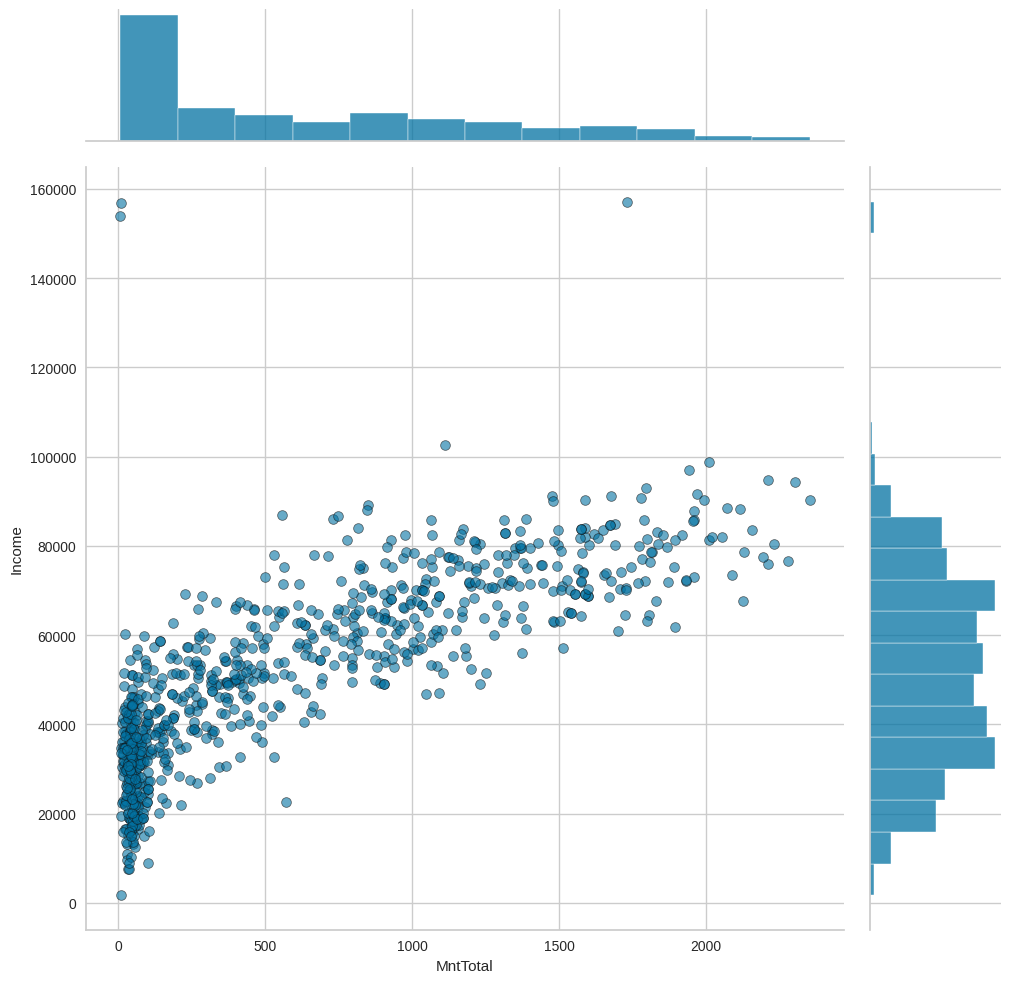

In [ ]:
sns.jointplot(data=df_cluster0,
                        x='MntTotal', y='Income',
                        alpha=.6,
                        height=10,
                        edgecolor='k')
plt.show()

O grupo 0 parece comprar bastante produtos e apresenta um rendimento médio elevado também.

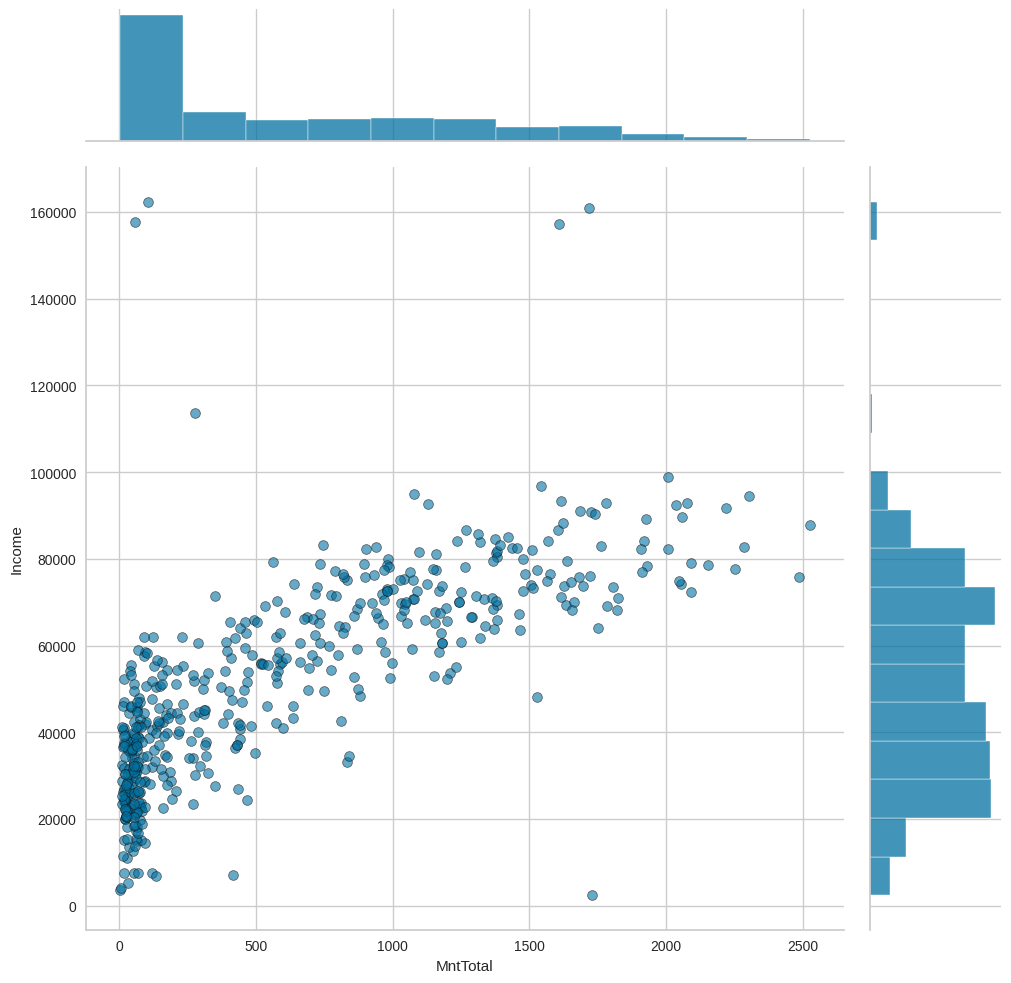

In [ ]:
sns.jointplot(data=df_cluster1,
                        x='MntTotal', y='Income',
                        alpha=.6,
                        height=10,
                        edgecolor='k')
plt.show()

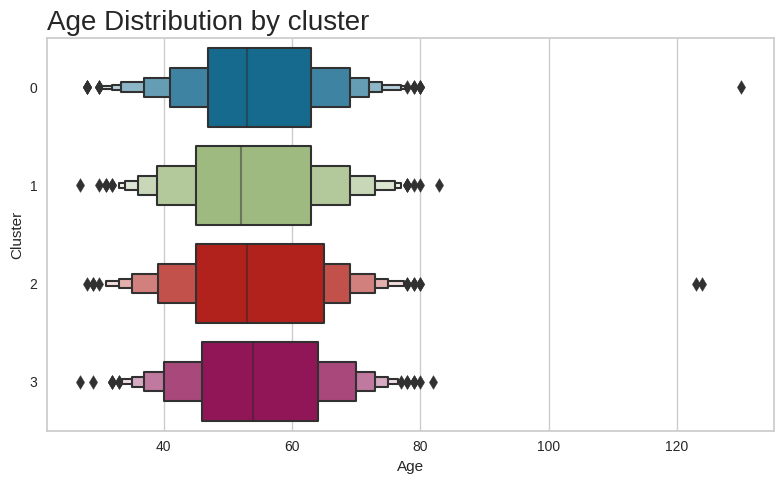

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))

# KMeans
sns.boxenplot(x='Age', y='Cluster', data=df_perfil, linewidth=1.5, orient='h')
ax.set_title('Age Distribution by cluster', loc='left', size=20)

plt.tight_layout()
plt.show()

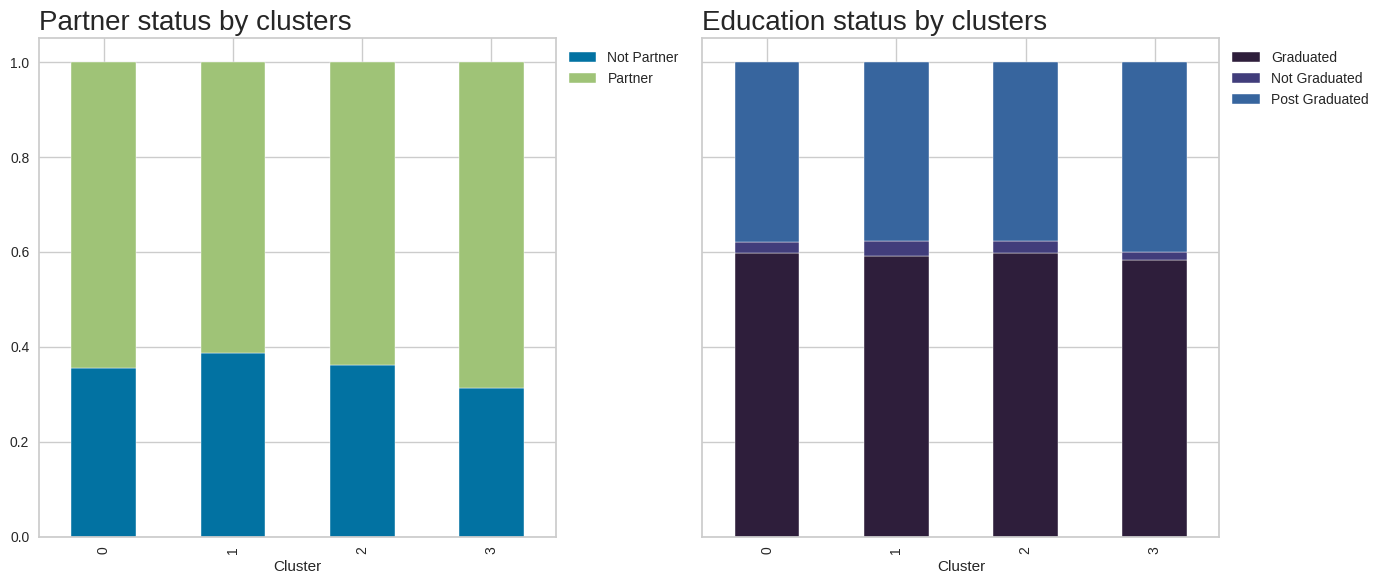

In [ ]:
group_by_partner = df_perfil.groupby('Cluster')['Partner'].value_counts(normalize=True).unstack()
group_by_graduated = df_perfil.groupby('Cluster')['Education'].value_counts(normalize=True).unstack()

fig, ax = plt.subplots(1,2, figsize=(14,6), sharey=True)

group_by_partner.plot(kind='bar',
                      stacked=True,
                     ax=ax[0])

ax[0].set_title('Partner status by clusters', size=20, loc='left')
ax[0].legend(loc='upper left', bbox_to_anchor=(1, 1))

group_by_graduated.plot(kind='bar',
                      stacked=True,
                     ax=ax[1],
                       color=sns.color_palette('mako'))

ax[1].set_title('Education status by clusters', size=20, loc='left')
ax[1].legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()